<a href="https://colab.research.google.com/github/sagargahalod/Misc/blob/master/2021_01_12_Classification_with_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports
Basic library imports and global settings

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine

train_size = 0.67

# Dataset
Let's load the dataset using scikit-learn's dataset module. 

By setting `as_frame=True` we can find a `frame` attribute in the return value which contains the whole dataset as a pandas dataframe.

In [3]:
#data = load_wine(as_frame=True)
d1,d2 = load_wine(return_X_y=True)
columns = ['var'+str(i) for i in range(d1.shape[1])]
df = pd.DataFrame(d1,columns=columns)
df['target']=d2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    178 non-null    float64
 1   var1    178 non-null    float64
 2   var2    178 non-null    float64
 3   var3    178 non-null    float64
 4   var4    178 non-null    float64
 5   var5    178 non-null    float64
 6   var6    178 non-null    float64
 7   var7    178 non-null    float64
 8   var8    178 non-null    float64
 9   var9    178 non-null    float64
 10  var10   178 non-null    float64
 11  var11   178 non-null    float64
 12  var12   178 non-null    float64
 13  target  178 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


We can see that the dataset has no missing values and its features are real.

In [5]:
df.isnull().sum()

var0      0
var1      0
var2      0
var3      0
var4      0
var5      0
var6      0
var7      0
var8      0
var9      0
var10     0
var11     0
var12     0
target    0
dtype: int64

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


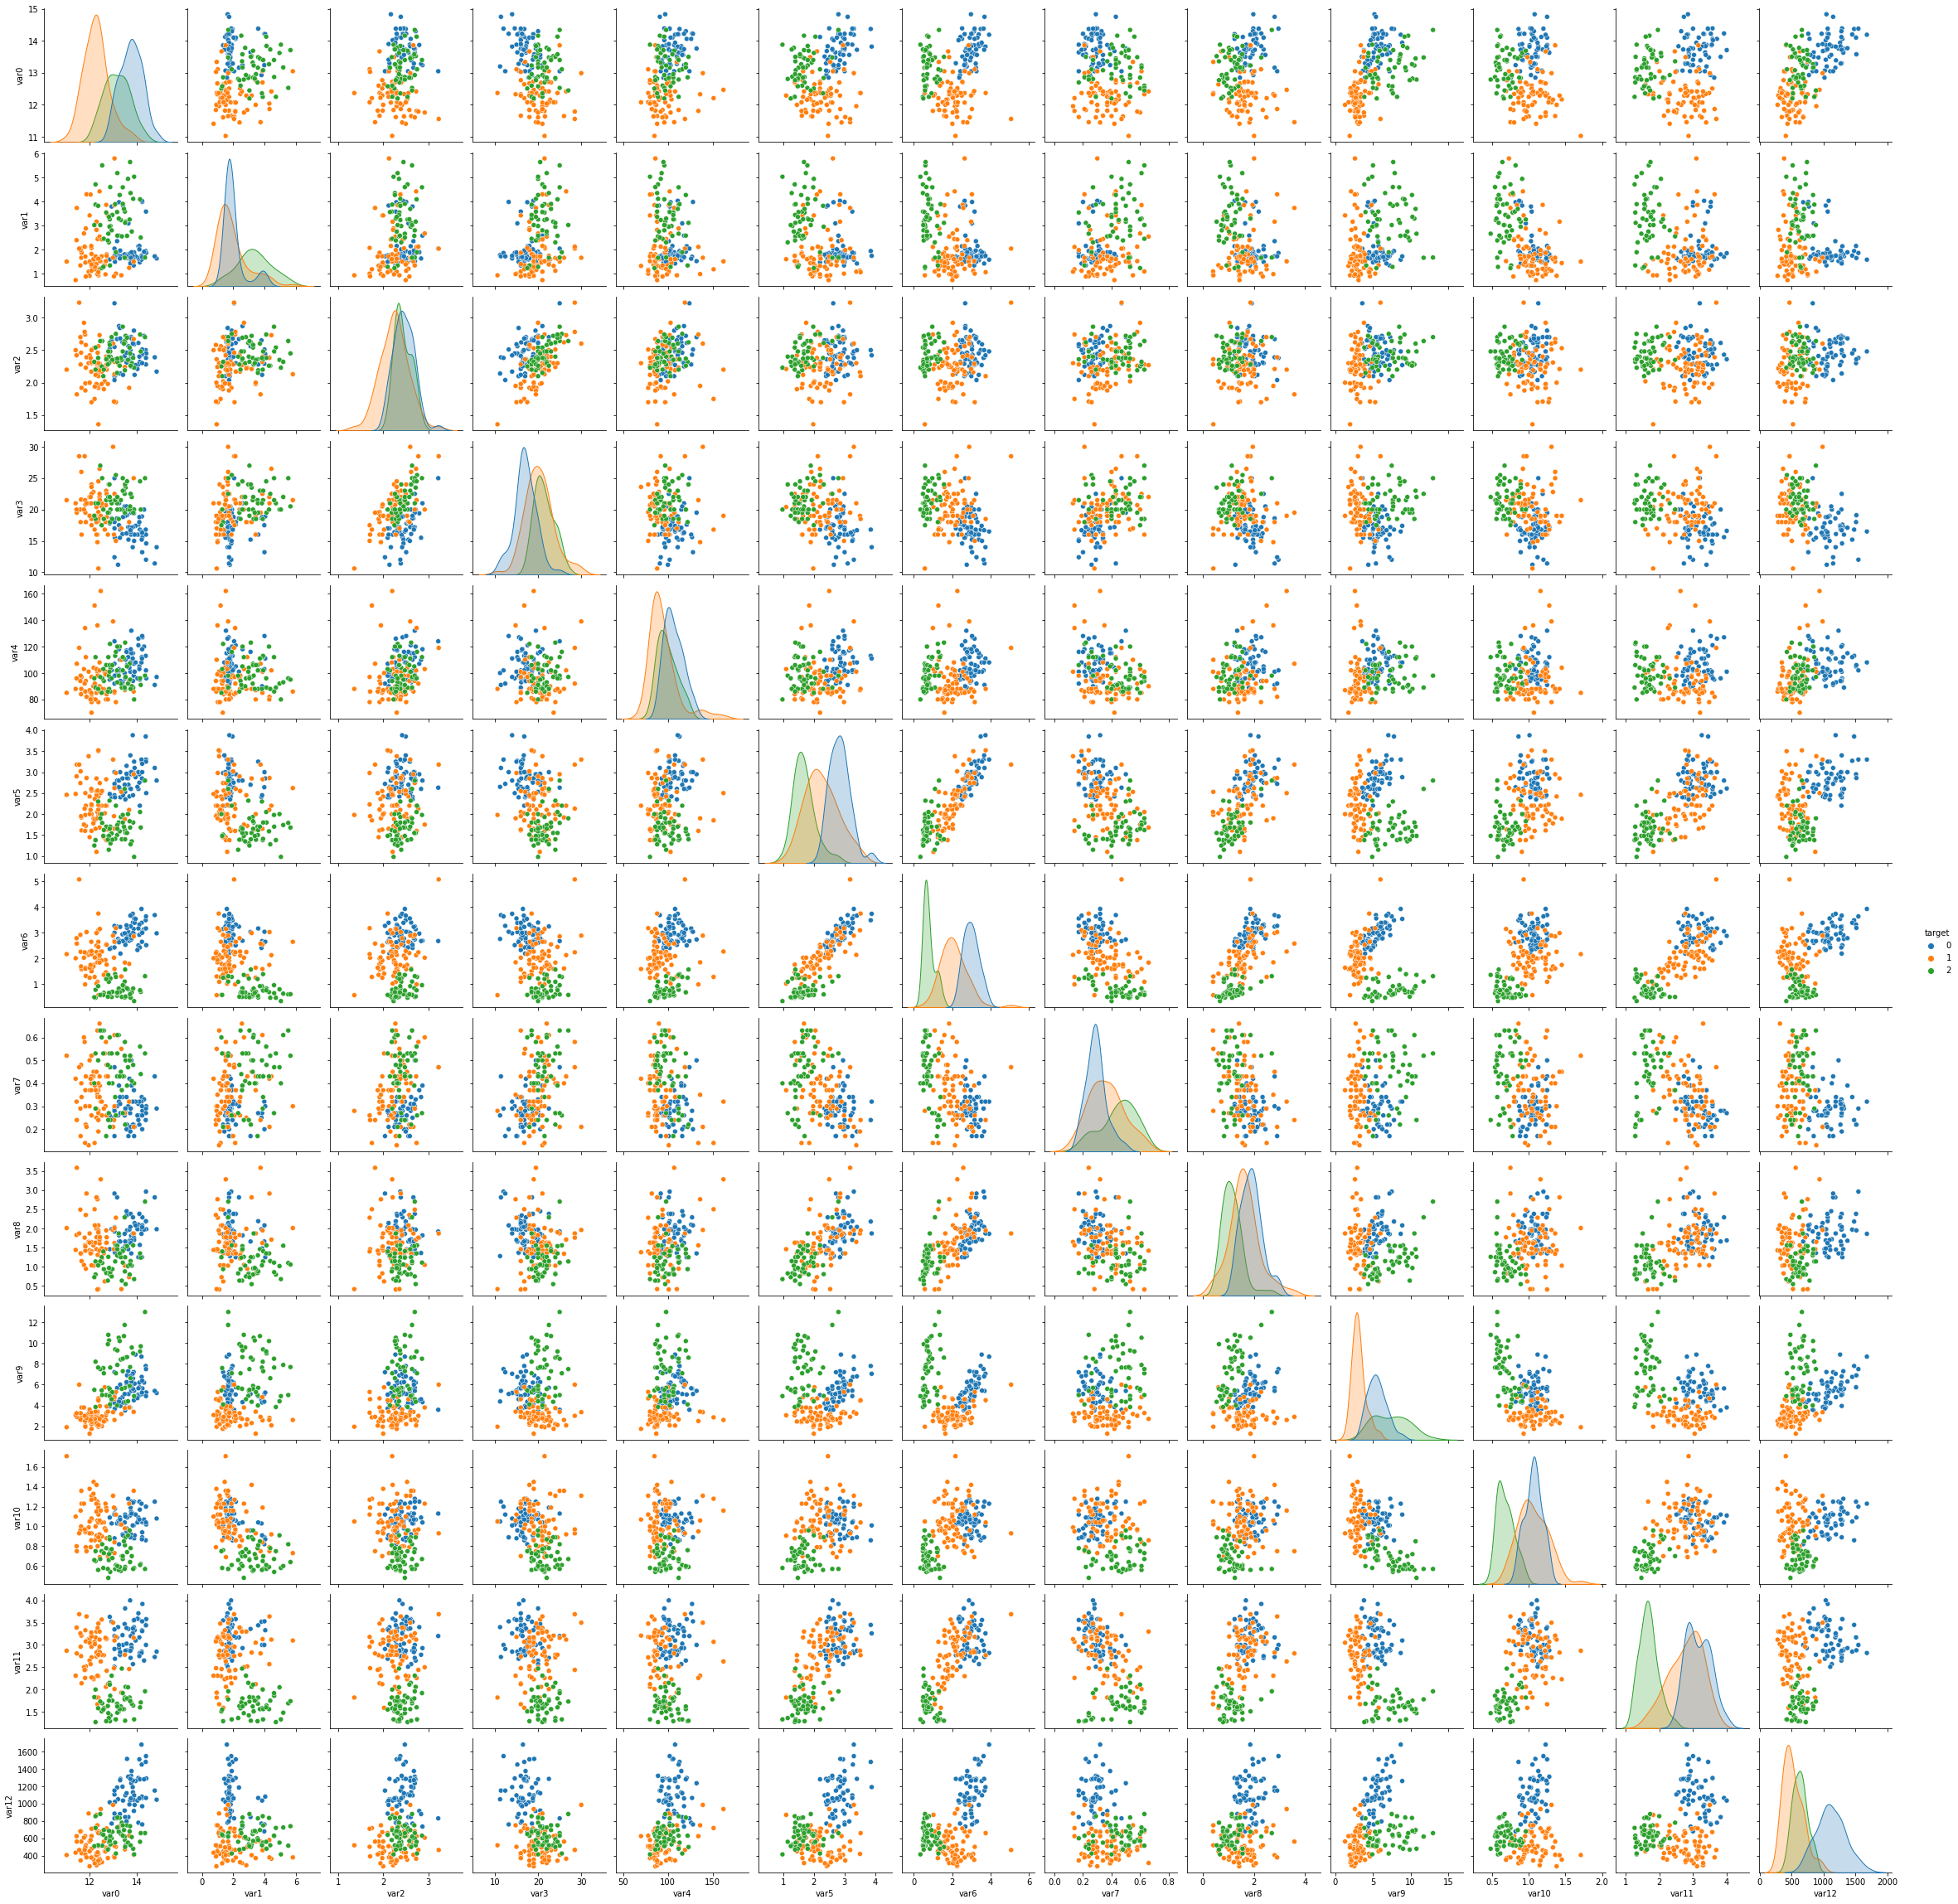

In [8]:
%matplotlib inline
import seaborn as sns
sns.pairplot(df, hue='target', palette='tab10');

For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``. We can do this using some of the Pandas ``DataFrame`` operations discussed in the [Chapter 3](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) of the above mentioned book.

For example, the `.drop` method allows to drop a column or row by name; remember to specify the axis to use, which is 1 for columns.

### Preparing features and target
Store in the variable `X` the content of `iris` excluding the column `species`. Verify the shape

In [12]:
X1 = df.drop('target',axis=1)
y1 = df['target']

In [ ]:
X = df.drop(target_name, axis=1)
X.shape

(178, 13)

Store in the variable `y` the column `species` of `iris`. Verify the shape

In [ ]:
y = df[target_name]
y.shape

(178,)

### Train test split
By setting `random_state=True` we ensure reproducibility of the train-test split. 

**Please note that in this case the dataset is only split into training set (X_train, y_train) and test set (X_test, y_test)**

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(133, 13) (45, 13) (133,) (45,)


With the data arranged, we can follow our recipe to predict the labels:
1. choose the model class, it will be `DecisionTreeClassifier`, imported from `sklearn.tree`<br>
2. instantiate the `model` as a `DecisionTreeClassifier` whithout any hyperparameter, we will use the defaults<br>
3. fit the `model` to data, calling its method `fit` with parameters `Xtrain, ytrain`<br>
4. predict the target `ytrain_model` using the `predict` method of `model` on the `Xtrain` data

In [ ]:
from sklearn.tree import DecisionTreeClassifier       # 1. choose model class
model = DecisionTreeClassifier()                      # 2. instantiate model
model.fit(Xtrain, ytrain)                             # 3. fit model to data
ytrain_model = model.predict(Xtrain)                  # 4. fir model to training data

We can use the ``accuracy_score`` utility to see the fraction of predicted training set labels that match their true value.

Import the `accuracy_score` from `sklearn.metrics` and call it on `ytrain, ytrain_model`

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(ytrain, ytrain_model)
print("The accuracy on training set is {0:.2f}%".format(accuracy_train * 100))

The accuracy on training set is 100.00%


Finally, predict the new target `ytest_model` using the `predict` method of `model` on the `Xtest` data, then compute the accuracy on the test set

--> insert your code in a new cell below this one

In [ ]:
ytest_model = model.predict(Xtest)                  # 4. predict on new data
accuracy_test = accuracy_score(ytest, ytest_model)
print("The accuracy on test set is {0:.2f}%".format(accuracy_test * 100))

The accuracy on test set is 95.56%


## Show the Decision Tree
To show the Decision Tree we will need a few imports

`from matplotlib import pyplot`<br>
`from sklearn.tree import plot_tree`<br>
`from matplotlib.pyplot import figure`

We will start setting the _figure size_ with the `figure` function, taking as argument `figsize` and a list of two values in inches, try and error for the measures you like.

We will then use the `plot_tree` function of `sklearn.tree`. It takes as argument the *fitted model*\, in our case `model` and several arguments to control how the tree is displayed.

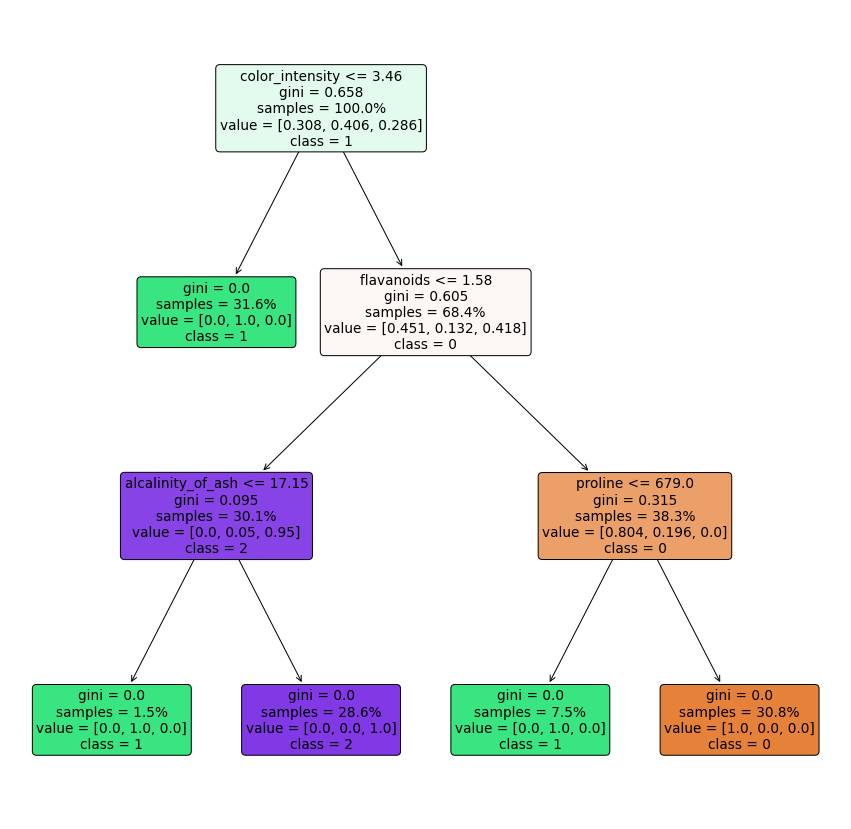

In [ ]:
from matplotlib import pyplot
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
figure(figsize = (15,15))
plot_tree(model 
#          , fontsize=6
          , filled=True
          , feature_names = X.columns
          , class_names = list(map(lambda x: str(x), list(y.unique())))
          , rounded = True
          , proportion = True
         );

In [11]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.4,random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train1,y_train1)
pred_train = dt.predict(X_train1)
pred_train

In [16]:
accu_train = accuracy_score(y_train1,pred_train)

In [ ]:
print ( ' Training accuracy is {0:.2f}%'.format(accu_train*100))

In [ ]:
pred_test = dt.predict(X_test1)
accu_test = accuracy_score(pred_test,y_test1)
print('Test data accuracy is : {0:.2f}%'.format(accu_test*100))

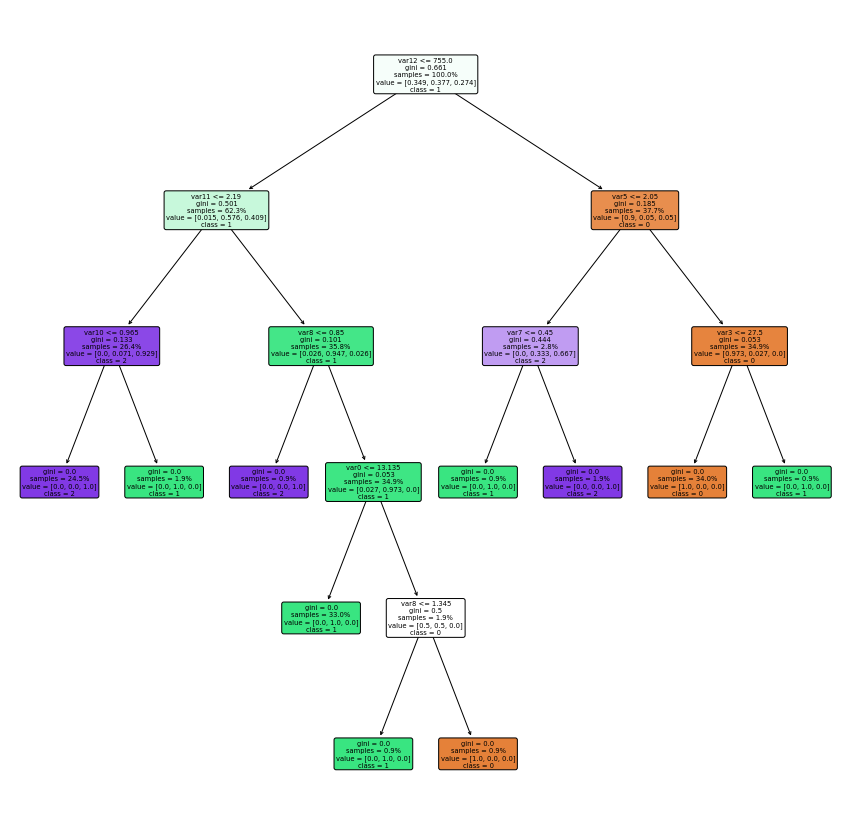

In [31]:
from matplotlib.pyplot import figure
figure(figsize = (15,15))
import numpy as np
plot_tree(dt,feature_names=X1.columns,
          rounded=True,proportion=True,filled=True,
          class_names=list(map(lambda x:str(x),list(y1.unique()))));
